In [22]:
from dolfin import *
import numpy as np
%matplotlib inline

### Load the mesh and define the problem

In [46]:
# Step 0
mesh = Mesh('simple.xml')
V = FunctionSpace(mesh, 'Lagrange', 3)
x = SpatialCoordinate(mesh)

f = conditional(le(sqrt(x[0]**2 + x[1]**2), 0.25), 25.0, 0.0)
kappa = conditional(le(sqrt(x[0]**2 + x[1]**2), 0.25), 25.0, 0.1)

Calling FFC just-in-time (JIT) compiler, this may take some time.


### define the boundary conditions

In [47]:
def boundary_g(x):
    return abs(x[1] + 1) < DOLFIN_EPS


def boundary_z(x):
    return abs(x[0] + 1) < DOLFIN_EPS or\
        abs(x[0] - 1) < DOLFIN_EPS or\
        abs(x[1] - 1) < DOLFIN_EPS


g = Expression('20.0 * (1-pow(x[0],2))', element=V.ufl_element())
bcg = DirichletBC(V, g, boundary_g)
bcz = DirichletBC(V, 0.0, boundary_z)
bc = [bcg, bcz]

### define the *trial* and *test* spaces

In [48]:
# Step 2
u = TrialFunction(V)
v = TestFunction(V)

In [49]:
v

### define the weak form

In [50]:
# Step 3
a = kappa*inner(grad(u), grad(v))*dx
L = f*v*dx

In [51]:
a = kappa*inner(grad(w), grad(v))*dx

NameError: name 'w' is not defined

### solve and plot

In [52]:
U = Function(V)
solve(a == L, U, bc)  # assemble the matrix, solve the matrix problem
file = File("u.pvd")
file << U

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


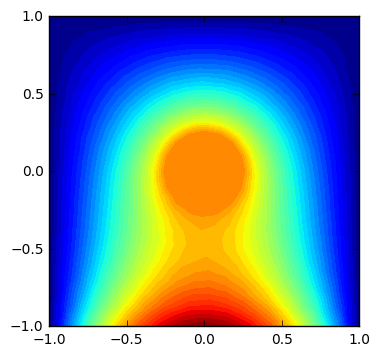

In [53]:
plot(U, interactive=True)

In [45]:
from IPython.display import HTML
HTML(X3DOM().html(U))